In [138]:
import pandas as pd
import numpy as np

# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

# Data wrangling and feature engineering
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Deep learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [7]:
not_fully_paid0 = df[df['not.fully.paid']==0]
not_fully_paid1 = df[df['not.fully.paid']==1]

In [8]:
print('not_fully_paid1    :',not_fully_paid1.shape,'\n','not_fully_paid0    :',not_fully_paid0.shape)

not_fully_paid1    : (1533, 14) 
 not_fully_paid0    : (8045, 14)


In [9]:
from sklearn.utils import resample
df_minority = resample(not_fully_paid1,n_samples = 8045,replace=True)

df = pd.concat([not_fully_paid0,df_minority])

from sklearn.utils import shuffle
df = shuffle(df)

In [10]:
df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [11]:
# Separate data to include numerical data only
num_data = df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", 
               "revol.util", "not.fully.paid"]]

In [12]:
# Check the features in the categorical data
cat_data = df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "not.fully.paid"]]

In [13]:
num_data.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid
count,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,1.609000e+04,16090.000000,16090.000000
mean,0.126717,331.233010,10.918552,12.779421,705.695152,4494.871600,1.921108e+04,48.959622,0.500000
std,0.026932,216.046425,0.639732,6.968271,36.941948,2474.362329,4.398412e+04,29.142480,0.500016
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,0.110300,167.120000,10.524064,7.280000,677.000000,2790.000000,3.163250e+03,24.900000,0.000000
50%,0.126100,277.450000,10.915088,12.890000,702.000000,4110.000000,8.764000e+03,49.800000,0.500000
75%,0.143800,469.780000,11.289832,18.240000,732.000000,5670.041667,1.914400e+04,73.500000,1.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,1.000000


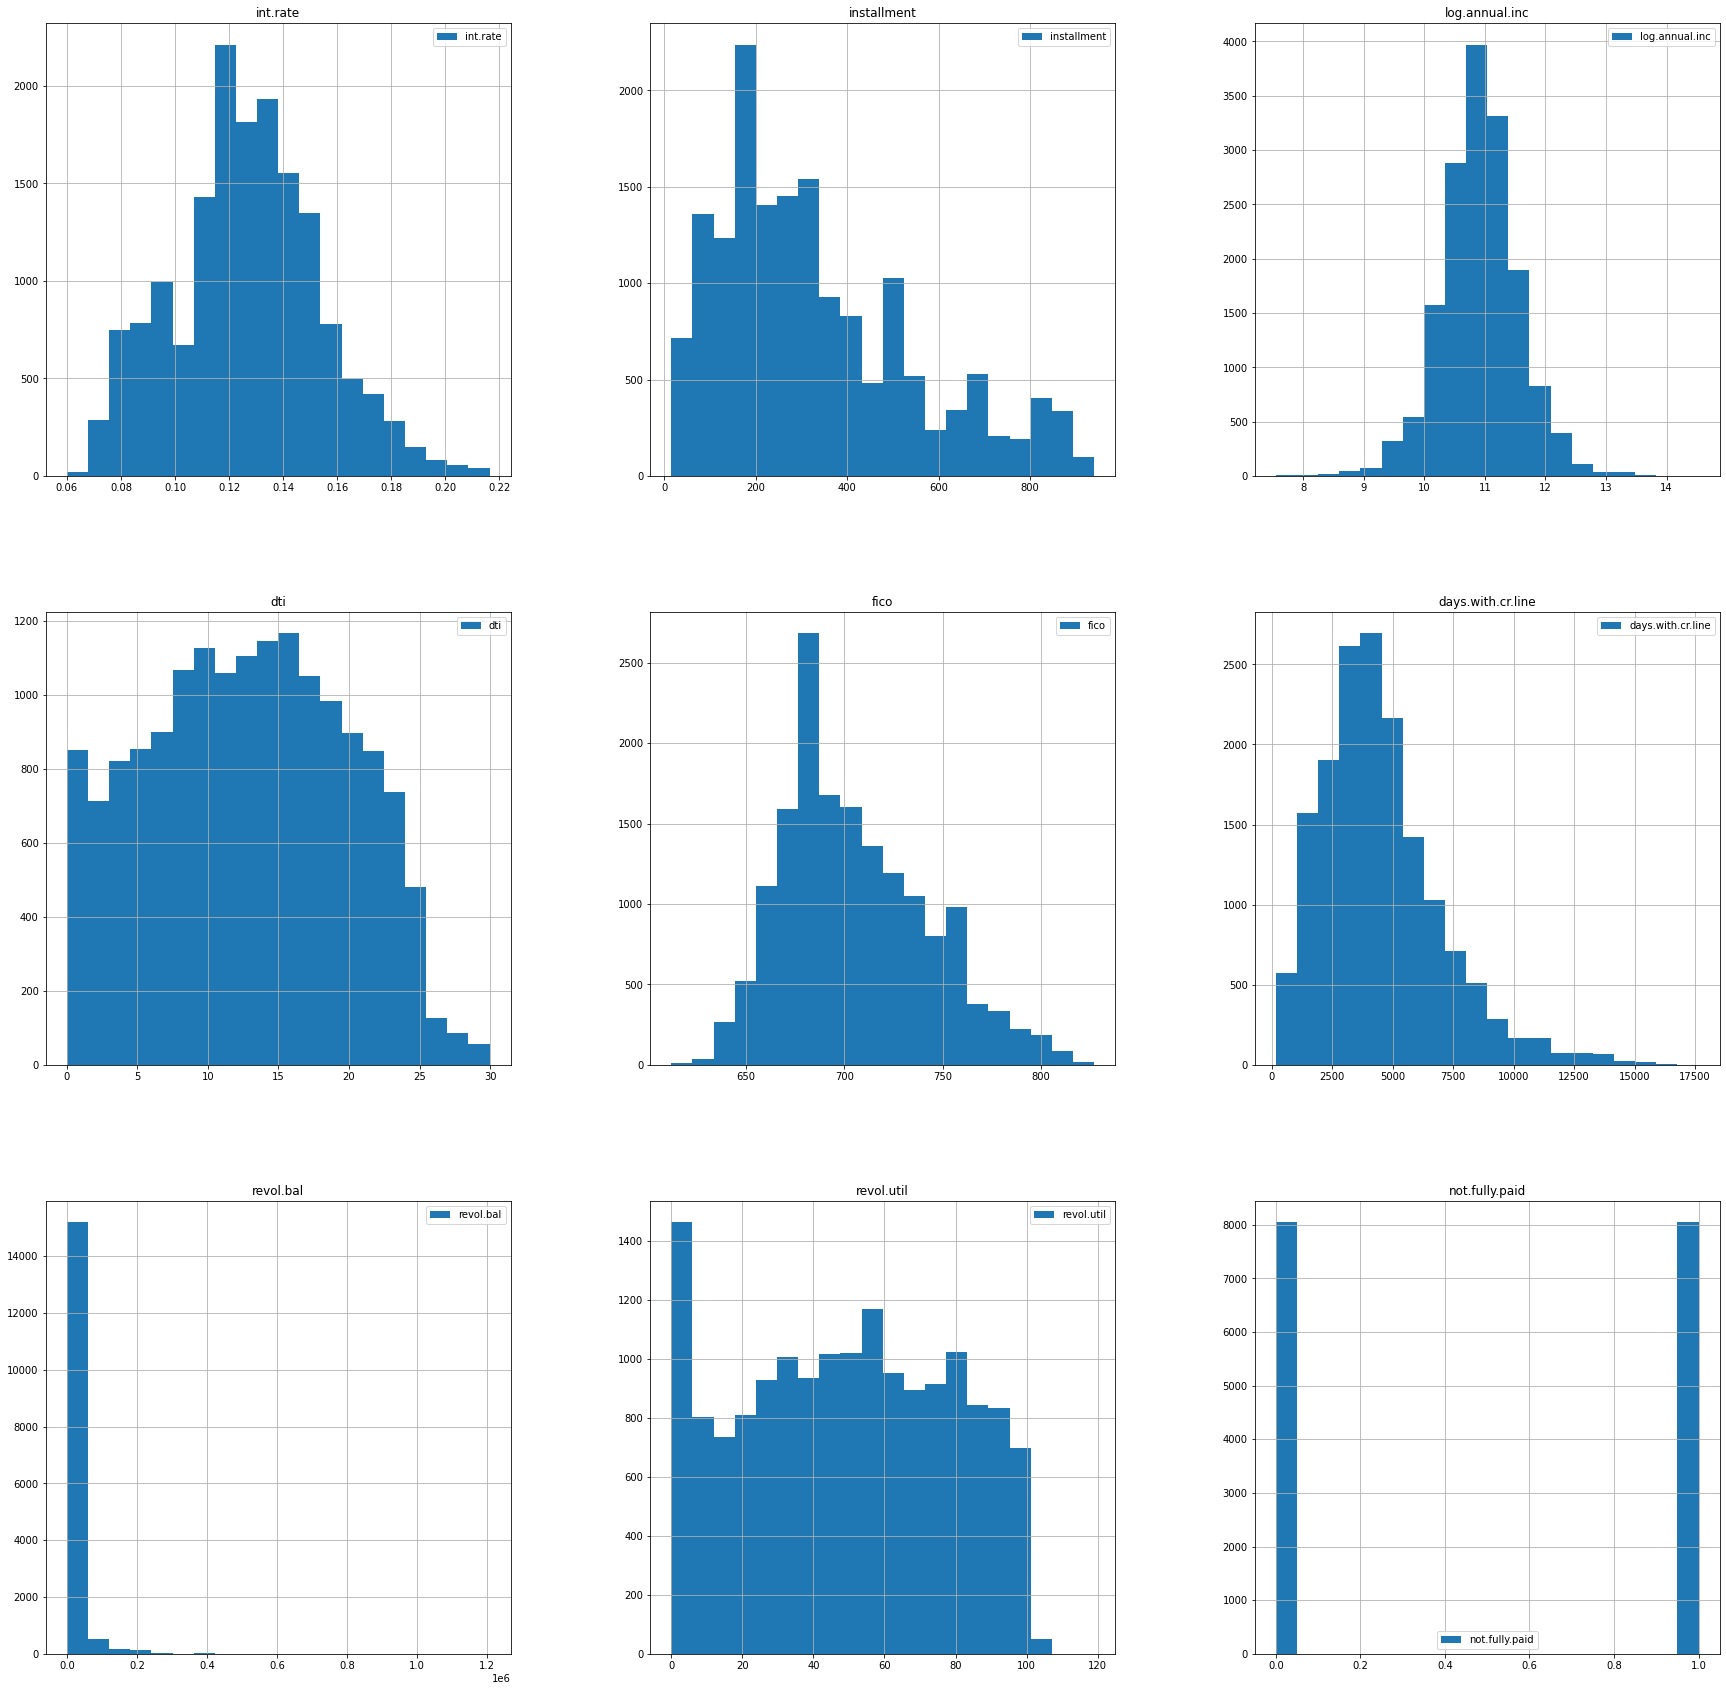

In [14]:
num_data.hist(figsize=(30,30),bins=20,legend=True)
plt.show()

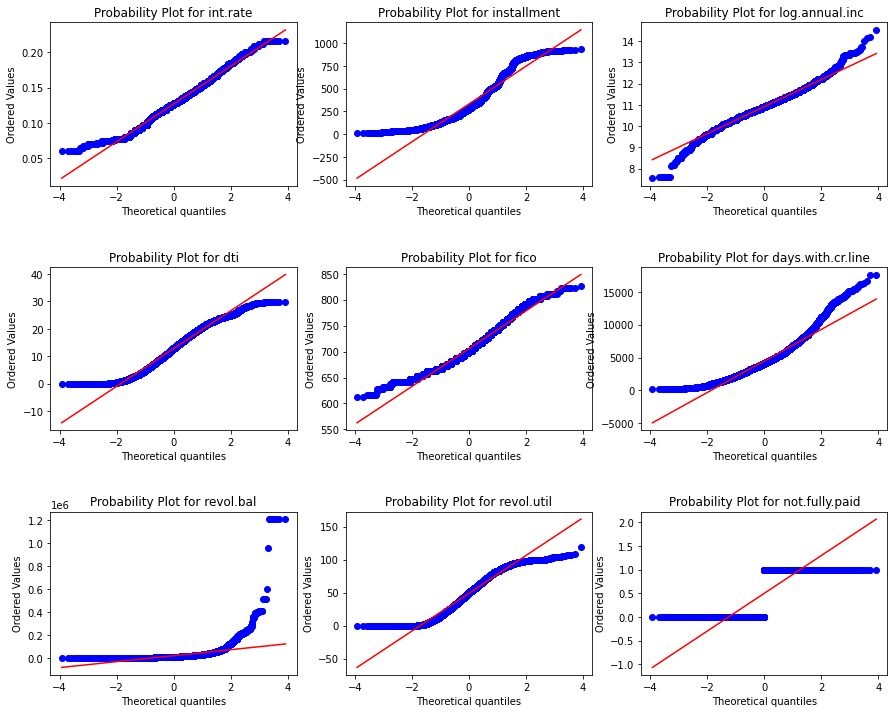

In [15]:
fig,ax= plt.subplots(3,3,figsize=(15,12),sharex=True)
fig.subplots_adjust(hspace=0.5)
for i,cols in enumerate(num_data):
  axx = plt.subplot(3,3,i+1)
  stats.probplot(num_data[cols],plot = axx)
  axx.set_title(f"Probability Plot for {cols}")
plt.show()

In [16]:
#  it can be seen that the variables such as revol.bal, days.with.cr.line, installment, fico, and revol.util 
# they may contain outliers because the values in these variables do not fall well around the best fit line.

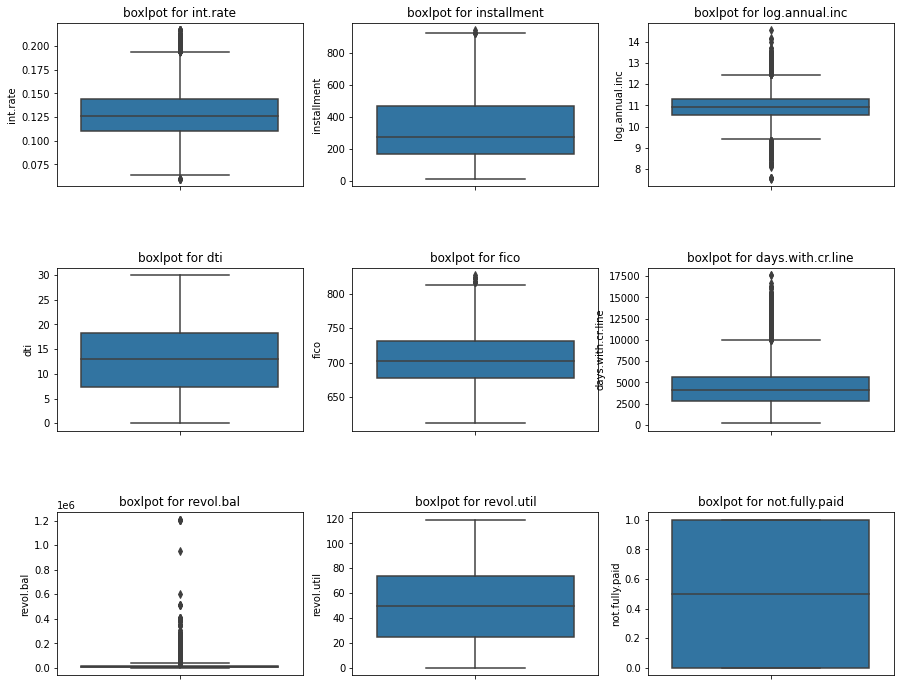

In [17]:
fig,ax = plt.subplots(3,3,figsize=(15,12),sharex=True)
fig.subplots_adjust(hspace=0.5)

for i,j in enumerate(num_data):
  ax = plt.subplot(3,3,i+1)
  sns.boxplot(y=num_data[j])
  ax.set_title(f'boxlpot for {j}')
plt.show()

In [18]:
# From the graphs above, it can be seen that the outliers exist in the variables 
# such as the following: int.rate, installment, log.annual.inc, fico, days.with.cr.line and revol.bal. These outliers will be handles later.

In [19]:
# Converting categorical feature into numerical feature
cat_data = cat_data.copy()
le = preprocessing.LabelEncoder()
cat_data["purpose"] = le.fit_transform(cat_data["purpose"].astype(str))
cat_data.head()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,not.fully.paid
8008,0,6,5,2,1
7050,1,2,0,0,0
6386,1,2,5,0,0
8744,0,1,8,1,1
8357,0,0,5,1,1


In [20]:
cat_data.describe()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs,not.fully.paid
count,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000
mean,0.747296,2.029770,1.869733,0.170230,0.500000
std,0.434576,1.788958,2.521743,0.536373,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000,0.500000
75%,1.000000,2.000000,3.000000,0.000000,1.000000
max,1.000000,6.000000,33.000000,13.000000,1.000000


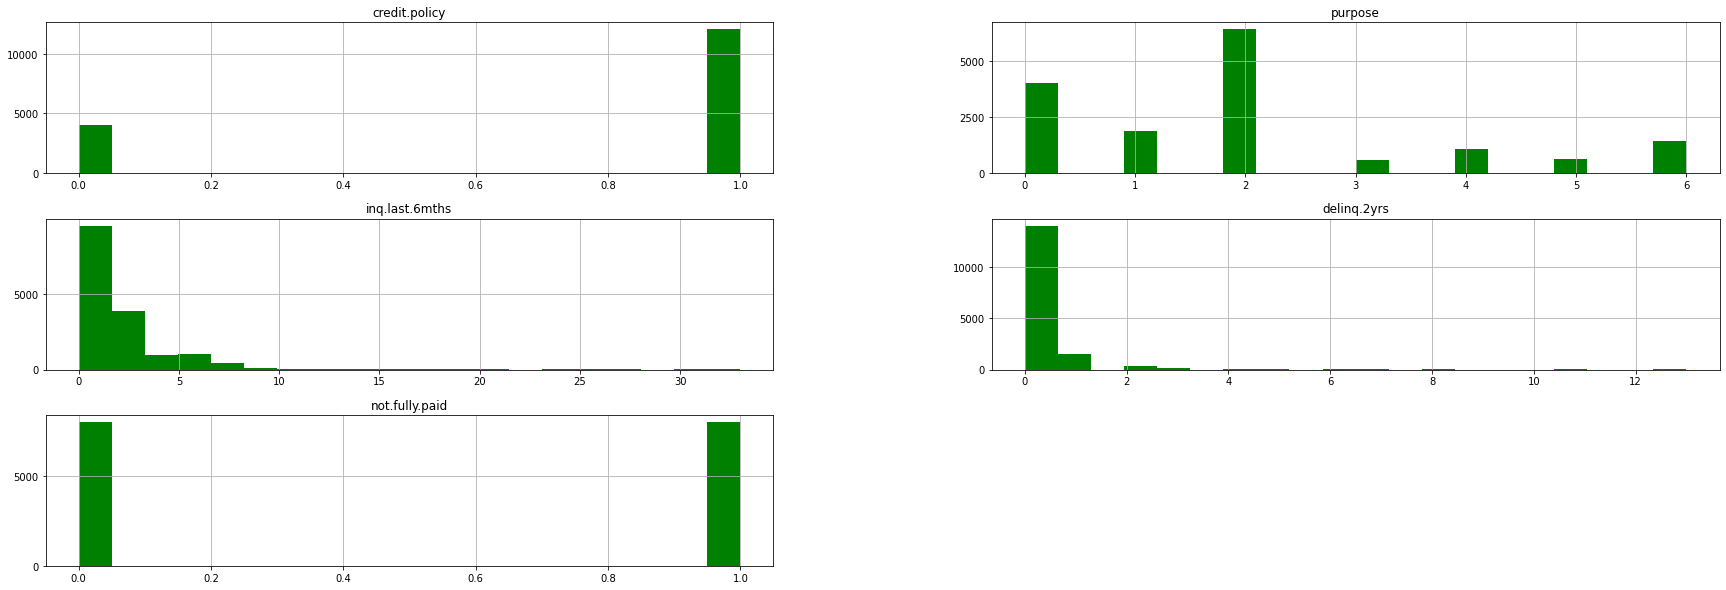

In [21]:
cat_data.hist(figsize=(30,10),bins=20,color='g')
plt.rcParams['font.size'] = '20'
plt.show()

In [22]:
# It can be seen that most of the categorical data is positively skewed.
# Most clients satisfied the credit policy.
# Most clients decided to take the loan for purposes of loan consolidation

In [23]:
le = preprocessing.LabelEncoder()
df["purpose"] = le.fit_transform(df["purpose"].astype(str))
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8008,0,6,0.1280,503.97,11.002100,22.44,687,4859.041667,23,1.3,5,2,0,1
7050,1,2,0.1311,398.19,11.238489,20.42,692,4267.041667,12764,44.3,0,0,1,0
6386,1,2,0.1148,478.05,11.277203,6.88,752,7592.000000,18003,35.0,5,0,0,0
8744,0,1,0.1064,244.27,10.596635,2.07,702,11730.000000,599,3.2,8,1,1,1
8357,0,0,0.1324,169.05,10.239960,19.54,667,3960.041667,13542,56.4,5,1,0,1


In [24]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [25]:
num_data.describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,not.fully.paid
count,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,1.609000e+04,16090.000000,16090.000000
mean,0.126717,331.233010,10.918552,12.779421,705.695152,4494.871600,1.921108e+04,48.959622,0.500000
std,0.026932,216.046425,0.639732,6.968271,36.941948,2474.362329,4.398412e+04,29.142480,0.500016
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,0.110300,167.120000,10.524064,7.280000,677.000000,2790.000000,3.163250e+03,24.900000,0.000000
50%,0.126100,277.450000,10.915088,12.890000,702.000000,4110.000000,8.764000e+03,49.800000,0.500000
75%,0.143800,469.780000,11.289832,18.240000,732.000000,5670.041667,1.914400e+04,73.500000,1.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,1.000000


In [26]:
# Upper bounded outliers
for var in ['int.rate' ,'installment','fico', 'days.with.cr.line', 'revol.bal', 'not.fully.paid']:
  df[var].clip(upper = df[var].quantile(0.95),inplace=True)

# Lower and Upper bounded outliers
for var in ['log.annual.inc']:
  df[var] = df[var].clip(upper = df[var].quantile(0.95),lower = df[var].quantile(0.05))

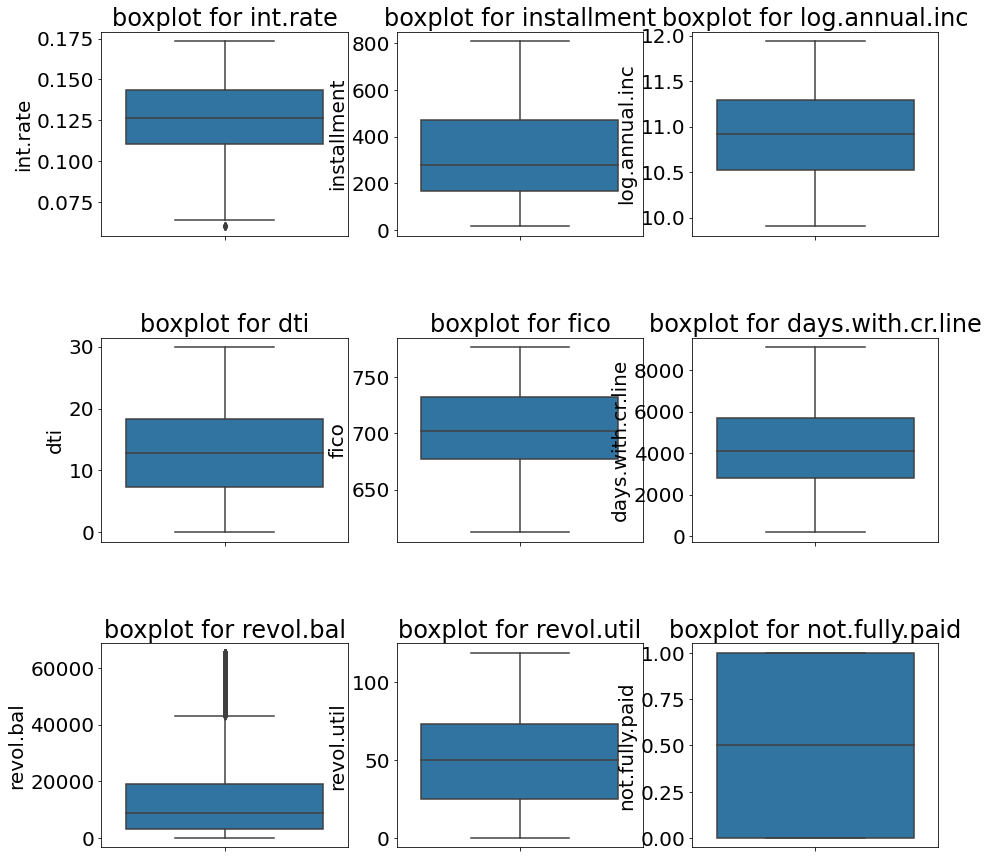

In [27]:
fig,ax = plt.subplots(3,3,figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i,j in enumerate(df[num_data.columns]):
  ax = plt.subplot(3,3,i+1)
  sns.boxplot(y=df[j])
  ax.set_title(f'boxplot for {j}')
plt.show()

In [28]:
# Check for skewness in the numerical features
vars_skewed = df[num_data.columns].apply(lambda x: skew(x)).sort_values(ascending=False)
vars_skewed

revol.bal            1.709400
installment          0.781616
days.with.cr.line    0.470738
fico                 0.362407
dti                  0.017470
log.annual.inc       0.006915
not.fully.paid       0.000000
revol.util          -0.034960
int.rate            -0.098591
dtype: float64

In [29]:
vars_skewed = vars_skewed[vars_skewed>0.3]
vars_skewed

revol.bal            1.709400
installment          0.781616
days.with.cr.line    0.470738
fico                 0.362407
dtype: float64

In [30]:
for i in  vars_skewed.index:
  df[i] = np.log1p(df[i])

In [31]:
vars_skewed= df[num_data.columns].apply(lambda x: skew(x)).sort_values(ascending=False)
vars_skewed

fico                 0.273172
dti                  0.017470
log.annual.inc       0.006915
not.fully.paid       0.000000
revol.util          -0.034960
int.rate            -0.098591
installment         -0.586084
days.with.cr.line   -1.146639
revol.bal           -2.284327
dtype: float64

In [32]:
# for i in cat_data.columns:
#   print(df[i].value_counts(),'\n')

In [33]:
x_num = df[num_data.columns.drop('not.fully.paid')]
x_num

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
8008,0.1280,6.224499,11.002100,22.44,6.533789,8.488802,3.178054,1.3
7050,0.1311,5.989437,11.238489,20.42,6.541030,8.358910,9.454462,44.3
6386,0.1148,6.171805,11.277203,6.88,6.624065,8.934982,9.798349,35.0
8744,0.1064,5.502360,10.596635,2.07,6.555357,9.118333,6.396930,3.2
8357,0.1324,5.136093,10.239960,19.54,6.504288,8.284262,9.513625,56.4
...,...,...,...,...,...,...,...,...
1388,0.1209,6.396329,11.112448,19.22,6.555357,8.560444,10.038805,64.5
5621,0.1287,5.376481,11.167261,11.09,6.533789,8.804025,9.414750,40.0
2714,0.1347,6.011463,10.149097,9.20,6.583409,9.118333,9.339437,94.8
3009,0.1347,5.607235,10.550931,12.59,6.533789,8.137968,8.620832,60.9


In [34]:
y = df[['not.fully.paid']]

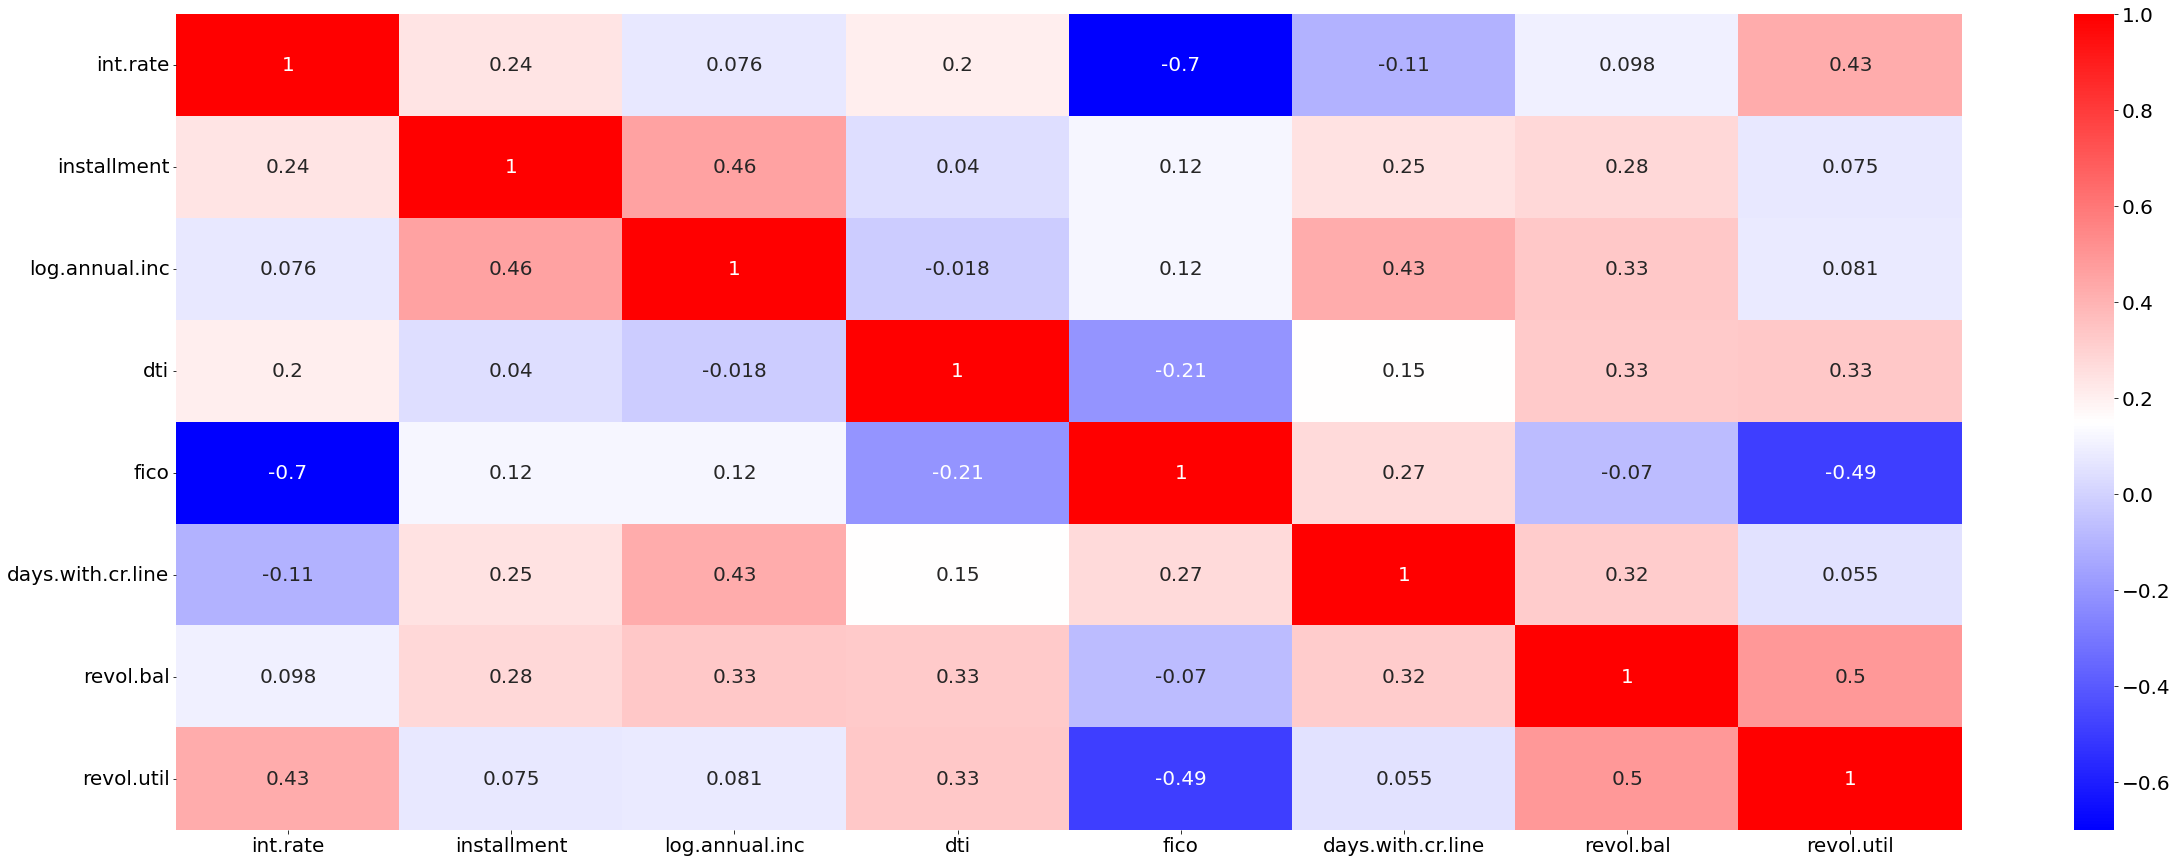

In [35]:
plt.figure(figsize=(40,15))
sns.heatmap(x_num.corr(),annot=True,cmap='bwr')
plt.show()

In [36]:
matrix =x_num.corr().unstack()
sorted_pairs = matrix.sort_values()

In [37]:
sorted_pairs[abs(sorted_pairs)>0.7]

int.rate           int.rate             1.0
days.with.cr.line  days.with.cr.line    1.0
fico               fico                 1.0
dti                dti                  1.0
log.annual.inc     log.annual.inc       1.0
installment        installment          1.0
revol.bal          revol.bal            1.0
revol.util         revol.util           1.0
dtype: float64

In [39]:
from sklearn.svm import SVR
estimator = SVR(kernel='linear')
rfe = RFE(estimator,n_features_to_select=5,step = 1)
rfe= rfe.fit(x_num,y.values)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [41]:
list(zip(x_num.columns ,rfe.support_,rfe.ranking_))

[('int.rate', True, 1),
 ('installment', True, 1),
 ('log.annual.inc', True, 1),
 ('dti', False, 3),
 ('fico', True, 1),
 ('days.with.cr.line', True, 1),
 ('revol.bal', False, 2),
 ('revol.util', False, 4)]

In [45]:
selected_cols = x_num.columns[rfe.support_]
selected_cols

Index(['int.rate', 'installment', 'log.annual.inc', 'fico',
       'days.with.cr.line'],
      dtype='object')

In [58]:
best_num_cols = df[selected_cols]

In [65]:
# select best categrical columns

In [66]:
cat_vars = df[cat_data.columns].drop('not.fully.paid',axis=1)
cat_vars.head()

,credit.policy,purpose,inq.last.6mths,delinq.2yrs
8008,0,6,5,2
7050,1,2,0,0
6386,1,2,5,0
8744,0,1,8,1
8357,0,0,5,1


In [71]:
f_p_values = chi2(cat_vars,df['not.fully.paid'])
f_p_values

(array([ 155.64071856,  116.07241495, 1634.36191996,    7.05403432]),
 array([1.01432920e-35, 4.58254427e-27, 0.00000000e+00, 7.90869323e-03]))

In [81]:
# wseeing what value belongs to which feature
pd.Series(f_p_values[1],cat_vars.columns).sort_values(ascending=True)

inq.last.6mths    0.000000e+00
credit.policy     1.014329e-35
purpose           4.582544e-27
delinq.2yrs       7.908693e-03
dtype: float64

In [82]:
# all four categorical columns have p value less than 0.05 . so consider all of them

In [85]:
x = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'inq.last.6mths','credit.policy', 'purpose','delinq.2yrs']]
x.head()

,int.rate,installment,log.annual.inc,dti,fico,inq.last.6mths,credit.policy,purpose,delinq.2yrs
8008,0.1280,6.224499,11.002100,22.44,6.533789,5,0,6,2
7050,0.1311,5.989437,11.238489,20.42,6.541030,0,1,2,0
6386,0.1148,6.171805,11.277203,6.88,6.624065,5,1,2,0
8744,0.1064,5.502360,10.596635,2.07,6.555357,8,0,1,1
8357,0.1324,5.136093,10.239960,19.54,6.504288,5,0,0,1


In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [89]:
# Scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [93]:
model  = keras.Sequential(
    [
        keras.layers.Dense(
        256, activation="relu", input_shape=[9]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2560      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 134,401
Trainable params: 134,401
Non-tr

In [94]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [98]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/100
51/51 [==============================] - 1s 21ms/step - loss: 0.4797 - binary_accuracy: 0.7547 - val_loss: 0.5214 - val_binary_accuracy: 0.7390
Epoch 2/100
51/51 [==============================] - 1s 14ms/step - loss: 0.4791 - binary_accuracy: 0.7571 - val_loss: 0.5165 - val_binary_accuracy: 0.7362
Epoch 3/100
51/51 [==============================] - 1s 13ms/step - loss: 0.4688 - binary_accuracy: 0.7609 - val_loss: 0.5187 - val_binary_accuracy: 0.7523
Epoch 4/100
51/51 [==============================] - 1s 12ms/step - loss: 0.4743 - binary_accuracy: 0.7557 - val_loss: 0.5071 - val_binary_accuracy: 0.7523
Epoch 5/100
51/51 [==============================] - 1s 12ms/step - loss: 0.4654 - binary_accuracy: 0.7641 - val_loss: 0.5140 - val_binary_accuracy: 0.7464
Epoch 6/100
51/51 [==============================] - 1s 13ms/step - loss: 0.4545 - binary_accuracy: 0.7702 - val_loss: 0.5073 - val_binary_accuracy: 0.7483
Epoch 7/100
51/51 [==============================] - 1s 13ms/ste

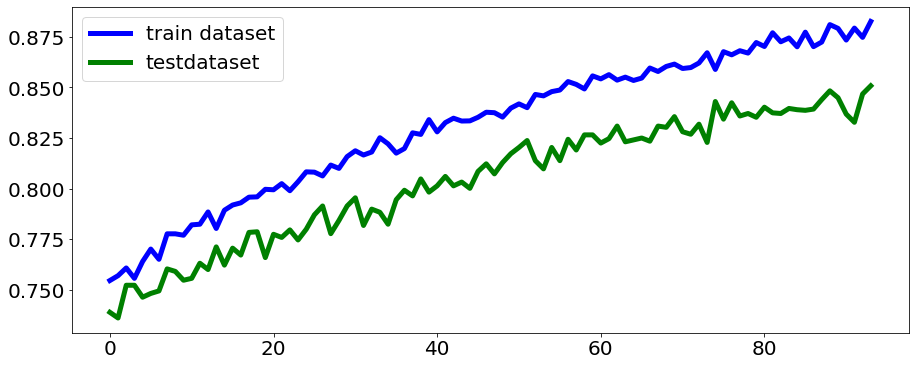

In [136]:
plt.figure(figsize=(15,6))
plt.plot(history.history['binary_accuracy'],color='b',label = 'train dataset',linewidth=5)
plt.plot(history.history['val_binary_accuracy'],color='g',label='testdataset',linewidth=5)
plt.legend()
plt.show()

# got accuracy around 88% on train set and 85% on test set